# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

## Trabalho sobre correlação e regressão

Utilizando os conhecimentos adquiridos em nosso treinamento realize a análise de regressão proposta abaixo.

Siga o roteiro proposto e vá completando as células vazias.

# <font color=green>DATASET DO PROJETO</font>
***

### Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

### Dados:
- **temp_media** - Temperatura Média (°C)
- **consumo** - Consumo de Cerveja (litros)


---

### Solução do problema com dependência do statsmodels

In [0]:
# !pip install scipy==1.2 --upgrade

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, scipy, statsmodels</font>

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot
import matplotlib.pyplot as plt

### Importe o dataset

In [5]:
dados = pd.read_csv("dados_projeto.csv", sep = ';')

### Visualize o conteúdo do DataFrame

In [6]:
dados.head()

,Y,X
0,25461,27.30
1,28972,27.02
2,30814,24.82
3,29799,23.98
4,28900,23.82


In [33]:
dados.shape

(365, 4)

### Obtenha e avalie as estatísticas descritivas dos dados

In [7]:
dados.describe()

,Y,X
count,365.000000,365.000000
mean,25401.367123,21.226356
std,4399.142703,3.180108
min,14343.000000,12.900000
25%,22008.000000,19.020000
50%,24867.000000,21.380000
75%,28631.000000,23.280000
max,37937.000000,28.860000


### Análise gráfica
### Construa um box plot para cada variável do dataset

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Temperatura Média (°C)'>

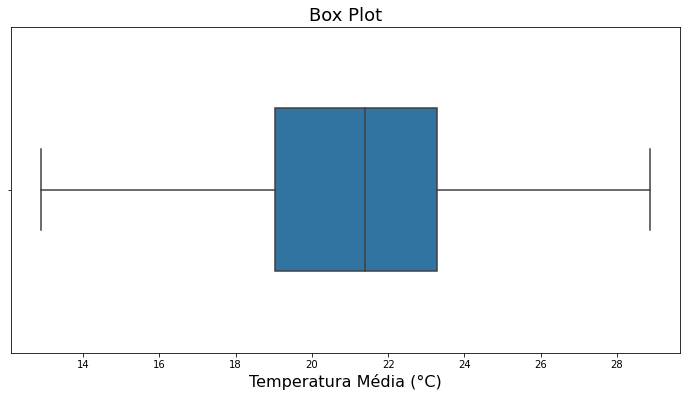

In [35]:
ax = sns.boxplot(data = dados, x = 'X', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box Plot', fontsize = 18)
ax.set_xlabel('Temperatura Média (°C)', fontsize = 16)
ax

<AxesSubplot:title={'center':'Box Plot'}, xlabel='Consumo de Cerveja (litros)'>

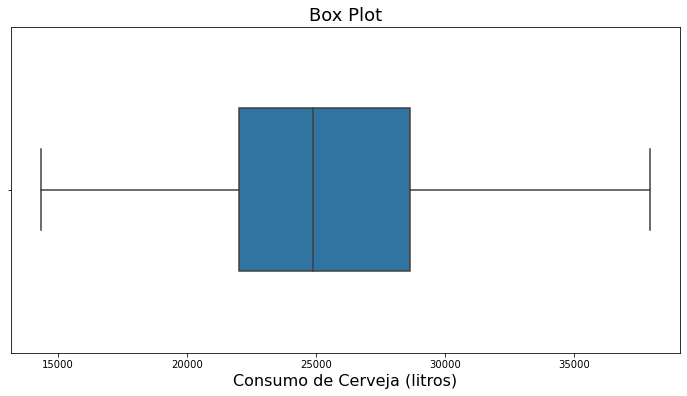

In [34]:
ax = sns.boxplot(data = dados, x = 'Y', orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Box Plot', fontsize = 18)
ax.set_xlabel('Consumo de Cerveja (litros)', fontsize = 16)
ax

### Identifique se existe uma relação linear entre as variáveis $Y$ e $X$
### <font color='red'>Utilizando o método gráfico</font>

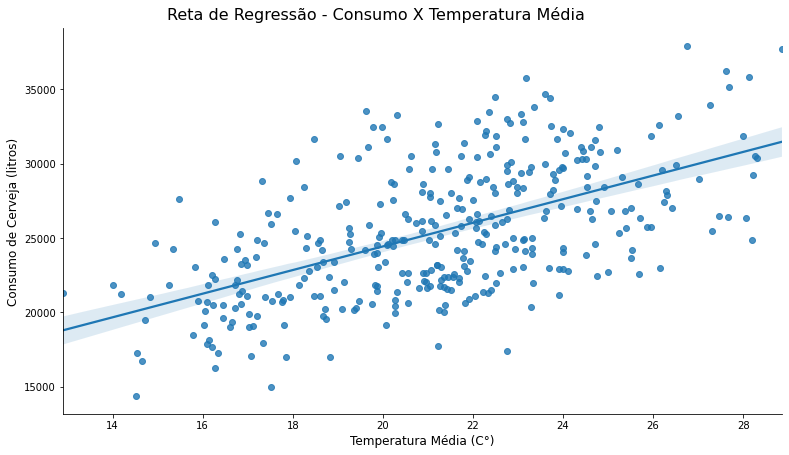

In [13]:
ax = sns.lmplot(data = dados, x = 'X', y = 'Y')
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - Consumo X Temperatura Média', fontsize = 16, y = 1.02)
ax.set_xlabels('Temperatura Média (C°)', fontsize = 12)
ax.set_ylabels('Consumo de Cerveja (litros)', fontsize = 12)
ax

### <font color='red'>Utilizando a matriz de correlação</font>

In [14]:
dados.corr()

,Y,X
Y,1.000000,0.574615
X,0.574615,1.000000


### Avalie os resultados acima:

É possível afirmar que existe uma relação linear entre as variáveis?

Resp.: Sim

É possível quantificar a intensidade dessa relação?

Resp.: Há uma relação média entre as variáveis. Através do coeficiente de correlação

É possível afirmar que existe uma relação de causalidade entre $Y$ e $X$ a partir dos resultados da matriz de correlação?

Resp.: Não. A causalidade só viria atráves de uma teoria por trás que esteja estudando

### Prepare os dados para estimar um modelo de regressão linear simples

In [16]:
Y = dados['Y']
X = sm.add_constant(dados['X'])

### Estime o modelo de regressão linear simples

In [17]:
resultado_regressao = sm.OLS(Y, X).fit()

### Visualize o resultado da regressão

In [18]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     178.9
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           1.87e-33
Time:                        16:26:28   Log-Likelihood:                -3506.3
No. Observations:                 365   AIC:                             7017.
Df Residuals:                     363   BIC:                             7024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8528.9073   1275.363      6.687      0.0

### Obtenha o $Y$ previsto

In [19]:
dados['Y_previsto'] = resultado_regressao.predict()
dados.head()

,Y,X,Y_previsto
0,25461,27.30,30229.200544
1,28972,27.02,30006.633434
2,30814,24.82,28257.891852
3,29799,23.98,27590.190521
4,28900,23.82,27463.009315


### Utilizando nosso modelo estimado para fazer previsões.
### Qual seria o consumo de cerveja para um dia com temperatura média de 42° C?

In [24]:
# Formula -> Y_previsto = beta1 + beta2 * Xi
Xi = 42
beta_1 = resultado_regressao.params[0] #intercepto
beta_2 = resultado_regressao.params[1] #coeficiente angular

Y = beta_1 + beta_2 * Xi
print(f'{Y.round(2)} Litros de consumo')

41913.97 Litros de consumo


In [37]:
# Modo 2, onde primeiro valor da lista é a constante 1 e o segundo o resultado desejado
resultado_regressao.predict([1, 42])[0]

41913.97383816629

### Obtenha os resíduos da regressão

In [25]:
dados['Residuos'] = resultado_regressao.resid

### Plote um gráfico de dispersão dos resíduos da regressão contra o $Y$ previsto

<AxesSubplot:title={'center':'Reta de Regressão - Residuos X Y_previsto'}, xlabel='Residuos', ylabel='Y_previsto'>

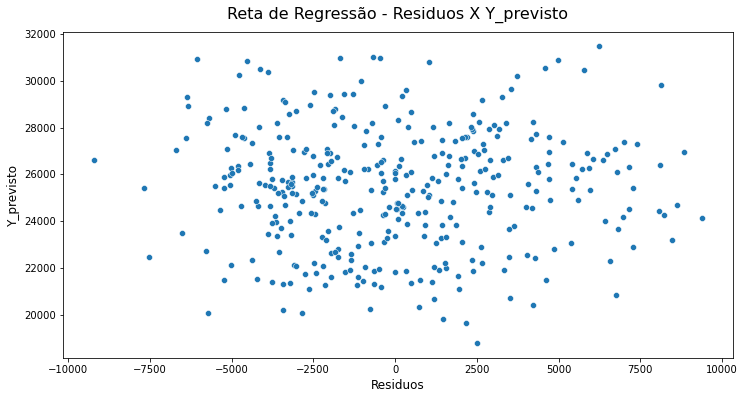

In [29]:
ax = sns.scatterplot(data = dados, x = 'Residuos', y = 'Y_previsto')
ax.figure.set_size_inches(12, 6)
ax.set_title('Reta de Regressão - Residuos X Y_previsto', fontsize = 16, y = 1.02)
ax.set_xlabel('Residuos', fontsize = 12)
ax.set_ylabel('Y_previsto', fontsize = 12)
ax

### Obtenha o QQPlot dos resíduos

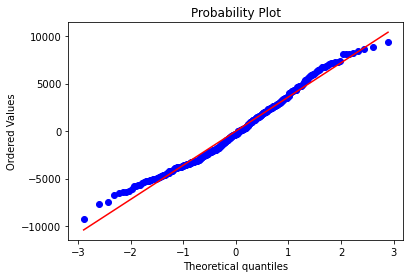

In [38]:
(_, (_, _, _)) = probplot(dados['Residuos'], plot = plt)

### <font color='red'>A partir dos outputs acima, qual conclusão podemos tirar sobre o comportamento dos resíduos?</font>

### Obtenha o R² da regressão pelo método da soma dos quadrados

# $$R^2 = \frac{SQR}{SQT}$$

In [39]:
SQE = resultado_regressao.ssr
SQE

4718394688.067692

In [40]:
SQR = resultado_regressao.ess
SQR

2325899486.7377872

In [41]:
SQT = SQR + SQE
SQT

7044294174.805479

In [43]:
R2 = SQR / SQT
R2

0.33018204933243217

In [31]:
resultado_regressao.rsquared

0.3301820493324321